# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [11]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [12]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [13]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
response = requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [14]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.content, "html.parser")

In [15]:
# Extract all rows of data
table = soup.find("table")
rows = table.find_all("tr")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [17]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    columns = row.find_all("td")
    columns = [col.text.strip() for col in columns]
    data.append(columns)

In [18]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
df = pd.DataFrame(data[1:], columns=column_names)  
# Skip the first row (header)

In [20]:
# Confirm DataFrame was created successfully
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [22]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  # Convert to datetime
df['sol'] = pd.to_numeric(df['sol'], errors='coerce')  # Convert to integer
df['ls'] = pd.to_numeric(df['ls'], errors='coerce')  # Convert to float or integer
df['month'] = pd.to_numeric(df['month'], errors='coerce')  # Convert to integer
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')  # Convert to float
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')  # Convert to float

In [23]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [24]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(num_months)


12


In [25]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print(num_sols)

1867


In [26]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


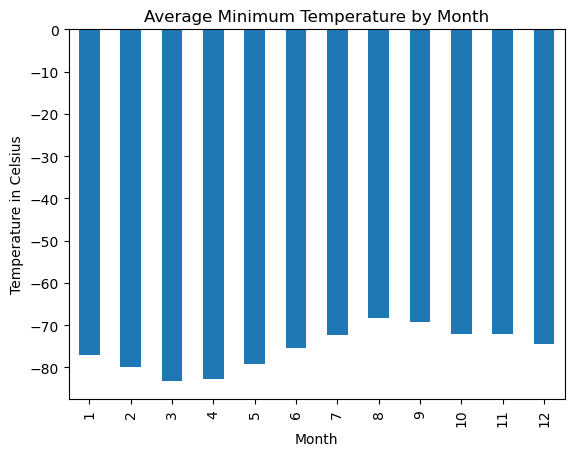

In [27]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', title='Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()


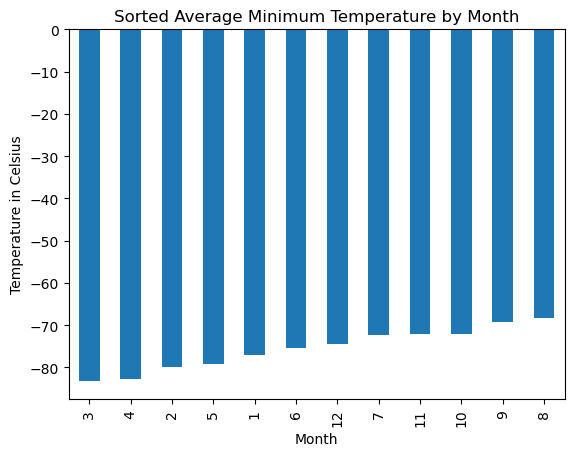

The coldest month on Mars is: 3
The hottest month on Mars is: 8


In [28]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()
sorted_avg_min_temp_by_month.plot(kind='bar', title='Sorted Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()
coldest_month = sorted_avg_min_temp_by_month.idxmin()
hottest_month = sorted_avg_min_temp_by_month.idxmax()

print(f"The coldest month on Mars is: {coldest_month}")
print(f"The hottest month on Mars is: {hottest_month}")

In [35]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
pressure_df = avg_pressure_by_month.reset_index()

print(pressure_df)
print(pressure_df.dtypes)

    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627
month         int64
pressure    float64
dtype: object


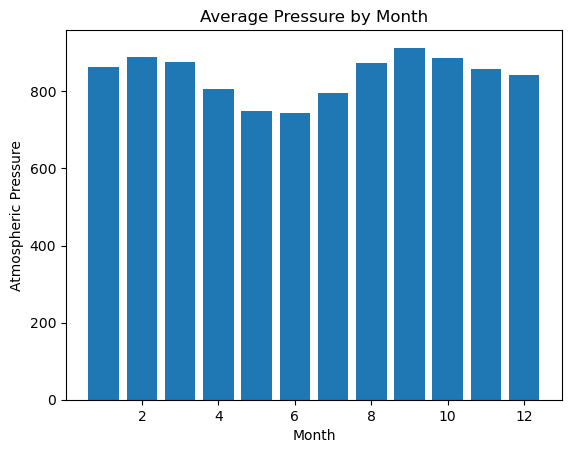

In [36]:
# Plot the average pressure by month
plt.bar(pressure_df['month'], pressure_df['pressure'])
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")


plt.show()

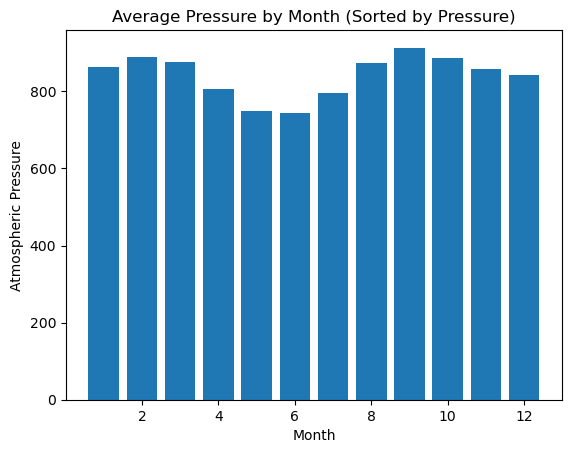

In [37]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_df_sorted = pressure_df.sort_values(by='pressure')
plt.bar(pressure_df_sorted['month'], pressure_df_sorted['pressure'])
plt.title("Average Pressure by Month (Sorted by Pressure)")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

plt.show()

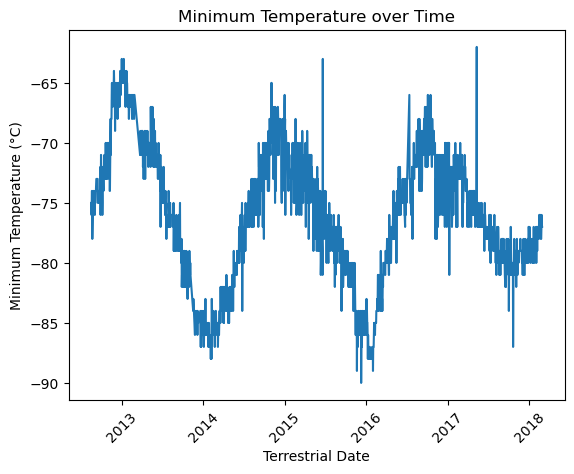

In [39]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the data
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Plotting the daily minimum temperature over time
plt.plot(df['terrestrial_date'], df['min_temp'])

# Adding titles and labels
plt.title("Minimum Temperature over Time")
plt.xlabel("Terrestrial Date")
plt.ylabel("Minimum Temperature (°C)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [40]:
# Write the data to a CSV
df.to_csv('martian_data.csv', index=False)
print("Data saved to martian_data.csv")

Data saved to martian_data.csv


In [41]:
browser.quit()